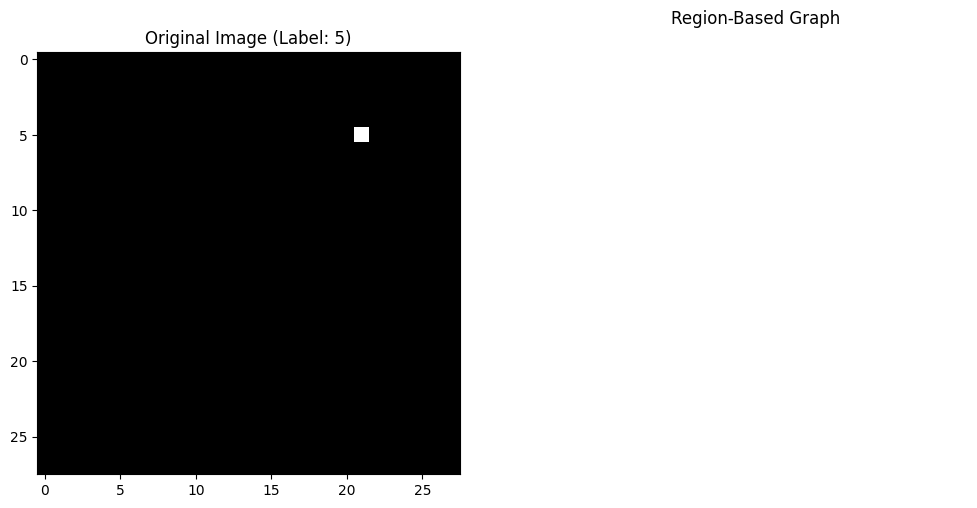

In [5]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.ndimage import label as nd_label  # Alias to avoid name conflict
from torchvision import datasets

# Load MNIST dataset
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())

def segment_image(image):
    # Thresholding to create a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    return binary_image

def find_regions(binary_image):
    # Label connected regions
    labeled_image, num_features = nd_label(binary_image)
    return labeled_image, num_features

def create_region_graph(labeled_image, num_features):
    # [Same as previous implementation]
    graph = nx.Graph()
    for i in range(1, num_features + 1):
        # Find coordinates of each region and calculate centroid
        region_coords = np.column_stack(np.where(labeled_image == i))
        centroid = np.mean(region_coords, axis=0)
        graph.add_node(i, pos=tuple(centroid))

    # Add edges (simple rule: connect sequential regions)
    for i in range(1, num_features):
        graph.add_edge(i, i+1)

    return graph

# Process a single image from MNIST
image, label = mnist[0]  # Change index for different images
image_array = np.array(image.squeeze(), dtype=np.uint8)  # Squeeze and convert to uint8

# Segment and find regions
binary_image = segment_image(image_array)
labeled_image, num_features = find_regions(binary_image)

# Create a graph
graph = create_region_graph(labeled_image, num_features)

# Visualization
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title(f"Original Image (Label: {label})")

# Graph Visualization
plt.subplot(1, 2, 2)
pos = nx.get_node_attributes(graph, 'pos')
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='lightblue')
plt.title("Region-Based Graph")
plt.show()
